In [1]:
%matplotlib inline
import numpy as np
from prondict import prondict
from lab2_proto import concatHMMs, forward
from lab2_tools import log_multivariate_normal_density_diag, logsumexp
from matplotlib import pyplot as plt


In [2]:
data = np.load('lab2_data.npz', allow_pickle=True)['data']
example=np.load('lab2_example.npz', allow_pickle=True)['example'].item()


In [3]:
phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()

In [4]:
list(sorted(phoneHMMs.keys()))

['ah',
 'ao',
 'ay',
 'eh',
 'ey',
 'f',
 'ih',
 'iy',
 'k',
 'n',
 'ow',
 'r',
 's',
 'sil',
 'sp',
 't',
 'th',
 'uw',
 'v',
 'w',
 'z']

In [5]:
phoneHMMs['sil']['transmat'].shape

(4, 4)

In [6]:
phoneHMMs['k']['transmat']

array([[0.8205889, 0.1794111, 0.       , 0.       ],
       [0.       , 0.6429007, 0.3570993, 0.       ],
       [0.       , 0.       , 0.8553886, 0.1446115],
       [0.       , 0.       , 0.       , 1.       ]])

In [7]:
isolated = {}
for digit in prondict.keys():
   isolated[digit] = ['sil'] + prondict[digit] + ['sil']

In [8]:
isolated

{'o': ['sil', 'ow', 'sil'],
 'z': ['sil', 'z', 'iy', 'r', 'ow', 'sil'],
 '1': ['sil', 'w', 'ah', 'n', 'sil'],
 '2': ['sil', 't', 'uw', 'sil'],
 '3': ['sil', 'th', 'r', 'iy', 'sil'],
 '4': ['sil', 'f', 'ao', 'r', 'sil'],
 '5': ['sil', 'f', 'ay', 'v', 'sil'],
 '6': ['sil', 's', 'ih', 'k', 's', 'sil'],
 '7': ['sil', 's', 'eh', 'v', 'ah', 'n', 'sil'],
 '8': ['sil', 'ey', 't', 'sil'],
 '9': ['sil', 'n', 'ay', 'n', 'sil']}

In [9]:
concatSounds = {}
for k,v in isolated.items():
   concatSounds[k] = concatHMMs(phoneHMMs, v)



[[0.8379803  0.1620197  0.         0.        ]
 [0.         0.9121278  0.08787217 0.        ]
 [0.         0.         0.7891916  0.2108084 ]
 [0.         0.         0.         0.        ]]
[[0.809113  0.190887  0.        0.       ]
 [0.        0.8904182 0.1095818 0.       ]
 [0.        0.        0.861858  0.1381421]
 [0.        0.        0.        1.       ]]
[[0.8379803  0.1620197  0.         0.         0.         0.
  0.        ]
 [0.         0.9121278  0.08787217 0.         0.         0.
  0.        ]
 [0.         0.         0.7891916  0.2108084  0.         0.
  0.        ]
 [0.         0.         0.         0.809113   0.190887   0.
  0.        ]
 [0.         0.         0.         0.         0.8904182  0.1095818
  0.        ]
 [0.         0.         0.         0.         0.         0.861858
  0.1381421 ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]
newwwwwww
[[0.8379803  0.1620197  0.         0.         0.         0.
  0.        ]
 [0.         0.9121278

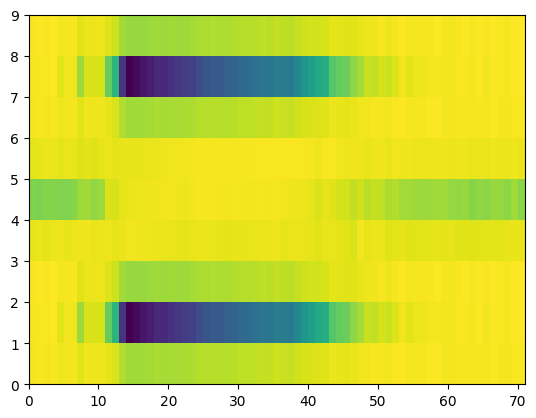

In [10]:
lpr= log_multivariate_normal_density_diag(example['lmfcc'], concatSounds['o']['means'], concatSounds['o']['covars'])
plt.pcolormesh(lpr.T)
plt.show()

/var/folders/pc/1ws5qy153vdgg93k7ngyjmkh0000gn/T/ipykernel_31527/955616857.py:1: RuntimeWarning: divide by zero encountered in log
  log_alpha = forward(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))


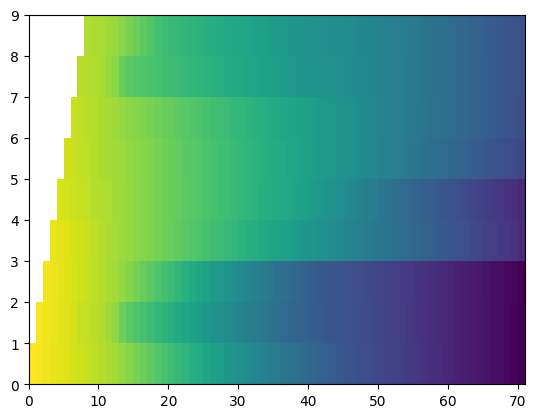

In [11]:
log_alpha = forward(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))
plt.pcolormesh(log_alpha.T)
plt.show()

In [12]:
loglik = logsumexp(log_alpha[-1])
np.isclose(loglik, example['loglik'])

True

In [13]:
results = []
for utt in data:
    loglikes = []
    mx = -float('inf')
    best = None
    for hmm in concatSounds.values():
        lpr = log_multivariate_normal_density_diag(utt['lmfcc'], hmm['means'], hmm['covars'])
        log_alpha = forward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
        loglik = logsumexp(log_alpha[-1])
        if loglik > mx:
            mx = loglik
            best = hmm
    results.append((best, utt['digit'], utt['gender']))

/var/folders/pc/1ws5qy153vdgg93k7ngyjmkh0000gn/T/ipykernel_31527/641489809.py:8: RuntimeWarning: divide by zero encountered in log
  log_alpha = forward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))


We noticed overfitting by gender

In [15]:
results

[{'name': 'silowsil',
  'startprob': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'transmat': array([[0.8379803 , 0.1620197 , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.9121278 , 0.08787217, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.7891916 , 0.2108084 , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.809113  , 0.190887  ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.8904182 ,
          0.1095818 , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.861858  , 0.1381421 , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        

[{'name': 'silowsil',
  'startprob': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'transmat': array([[0.8379803 , 0.1620197 , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.9121278 , 0.08787217, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.7891916 , 0.2108084 , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.809113  , 0.190887  ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.8904182 ,
          0.1095818 , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.861858  , 0.1381421 , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        